In [1]:
import sys
sys.path.append('../')

from quantumsim import *
from pennylane import numpy as np
import matplotlib.pyplot as plt

sz = np.array([[1,0],[0,-1]])
si = np.array([[1,0],[0,1]])
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])

J1 = 1
J2 = 1
J3 = -1

h_open = -J3*np.kron(si, np.kron(sz, sz)) -J3*np.kron(sz, np.kron(sz, si)) -J1*np.kron(si, np.kron(sx, sx)) -J1*np.kron(sx, np.kron(sx, si)) -J2*np.kron(si, np.kron(sy, sy)) -J2*np.kron(sy, np.kron(sy, si))
ee1 = np.sort( np.linalg.eigvals(h_open) )

h_close = -J3*np.kron(si, np.kron(sz, sz)) -J3*np.kron(sz, np.kron(sz, si)) -J1*np.kron(si, np.kron(sx, sx)) -J1*np.kron(sx, np.kron(sx, si)) -J2*np.kron(si, np.kron(sy, sy)) -J2*np.kron(sy, np.kron(sy, si))+\
    -J3*np.kron(sz, np.kron(si, sz)) -J1*np.kron(sx, np.kron(si, sx)) -J2*np.kron(sy, np.kron(si, sy)) 
ee2 = np.sort( np.linalg.eigvals(h_close) )

## Cadenas de espines

In [2]:
params = {
    "sites": 3,
    "spin": 0.5, 
    "pattern": "open",
    "exchange": [1,1,-1]
}

open_spin_chain = vqe_spin(params)
open_spin_chain.set_group_characteristics()


params = {
    "sites": 3,
    "spin": 0.5, 
    "pattern": "close",
    "exchange": [1,1,-1]
}

close_spin_chain = vqe_spin(params)
close_spin_chain.set_group_characteristics()

### Open spin chain

In [3]:
valores = []
for k in range(4):
    ansatz_params = {
        "repetitions": k+1,
        "base": "default.qubit",
        "interface": "autograd",
        "electrons": 0,
        "qubits": open_spin_chain.qubits,
        "pattern": "chain"
    }

    differents_ansatz = []
    parameters = []

    ansazt = he_ansatz()
    ansazt.set_device( ansatz_params )
    ansazt.set_node( ansatz_params )
    ansazt.set_state( ansatz_params["electrons"] )

    minimizate_params = {
            "type": "SLSQP",
            "maxiter": 40,
            "tol": 0.000001,
            "number": open_spin_chain.qubits*ansatz_params["repetitions"],
            "theta":["generic", 0.3]}

    open_spin_chain.node = ansazt.node
    optimizer = gradiend_optimizer(minimizate_params)
    energy1, optimum = optimizer.VQE(open_spin_chain.cost_function)
    valores.append(energy1)

/Users/jnorambu/Documents/vqesimulation/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


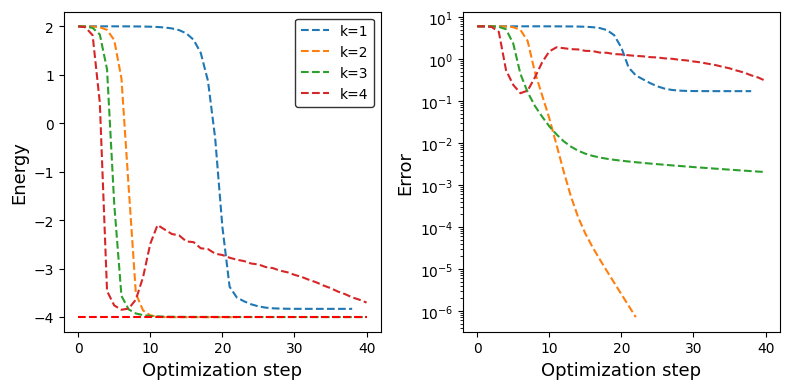

In [4]:
ee = ee1

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)
aux = max( [len(i) for i in valores] )

for i, val in enumerate(valores):
    ax[0].plot([j for j in range(len(val))], val, ls="dashed", label="k="+str(i+1))
    ax[1].plot([i for i in range(len(val))], [np.abs(val[j] -ee[0]) for j in range(len(val))], ls="dashed")
ax[0].plot([j for j in range( aux ) ], [ee[0] for j in range(aux)], "r", ls="dashed")
ax[1].set_yscale("log")

ax[0].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=1)
fig.tight_layout()
plt.show()

In [5]:
valores = []
for k in range(4):
    ansatz_params = {
        "repetitions": k+1,
        "base": "default.qubit",
        "interface": "autograd",
        "electrons": 1,
        "qubits": close_spin_chain.qubits,
        "pattern": "ring"
    }

    differents_ansatz = []
    parameters = []

    ansazt = he_ansatz()
    ansazt.set_device( ansatz_params )
    ansazt.set_node( ansatz_params )
    ansazt.set_state( ansatz_params["electrons"] )

    minimizate_params = {
            "type": "SLSQP",
            "maxiter": 40,
            "tol": 0.000001,
            "number": close_spin_chain.qubits*ansatz_params["repetitions"],
            "theta":["generic", 0.3]}

    close_spin_chain.node = ansazt.node
    optimizer = gradiend_optimizer(minimizate_params)
    energy1, optimum = optimizer.VQE(close_spin_chain.cost_function)
    valores.append(energy1)

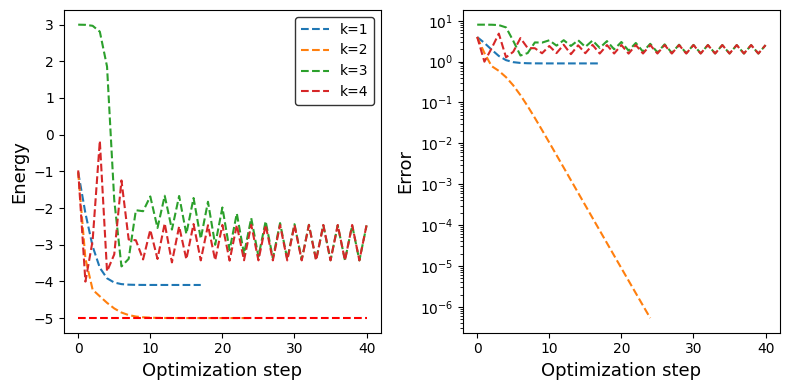

In [6]:
ee = ee2

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)
aux = max( [len(i) for i in valores] )

for i, val in enumerate(valores):
    ax[0].plot([j for j in range(len(val))], val, ls="dashed", label="k="+str(i+1))
    ax[1].plot([i for i in range(len(val))], [np.abs(val[j] -ee[0]) for j in range(len(val))], ls="dashed")
ax[0].plot([j for j in range( aux ) ], [ee[0] for j in range(aux)], "r", ls="dashed")
ax[1].set_yscale("log")

ax[0].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=1)
fig.tight_layout()
plt.show()